# 1. Problem Deutscha

Problem Deutscha polega na tym, aby mając dane cztery funkcje (dwie stałe i dwie zmienne) {0,1}->{0,1}, rozpoznać z jaką klasą funkcji mamy do czynienia. W wersji klasycznej konieczne jest przeprowadzenie dwóch testów dla dwu różnych wejść (0 i 1). W wersji kwantowej wystarczy przeprowadzić obliczenia jeden raz.

### Gdzie są cztery bramki obliczeniowe Uf, do jakich grup należą?
Bramki znajdują się poniżej, wewnątrz warstw bramek Hadamarda.
f0, f3 - obwody testowe do bramek stałych
f1, f2 - obwody testowe do bramek zmiennych


In [49]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.tools import job_monitor
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-05-06 17:47:07,310: Credentials are already in use. The existing account in the session will be replaced.


In [66]:
def sandwich(c):
    c.h(c.qubits)

def init(c):
    c.initialize([0, 0, 1, 0], [0, 1])

def execute_qasm(circuit):
    simulator = Aer.get_backend('qasm_simulator')
    result = execute(circuit, simulator).result()
    return result.get_counts(circuit)

def trim(d):
    return dict([(k[1:], v) for k, v in d.items()])

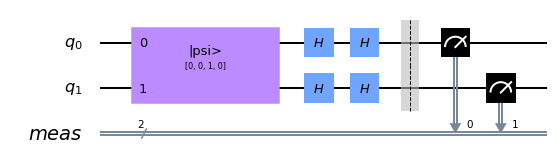

In [78]:
f0 = QuantumCircuit(2)
init(f0)
sandwich(f0)
sandwich(f0)
f0.measure_all()
f0.draw()

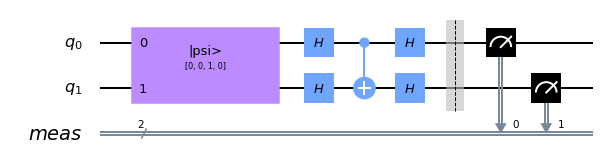

In [79]:
f1 = QuantumCircuit(2)
init(f1)
sandwich(f1)
f1.cx(0, 1)
sandwich(f1)
f1.measure_all()
f1.draw()

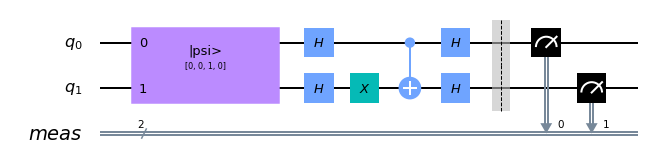

In [81]:
f2 = QuantumCircuit(2)
init(f2)
sandwich(f2)
f2.x(1)
f2.cx(0, 1)
sandwich(f2)
f2.measure_all()
f2.draw()

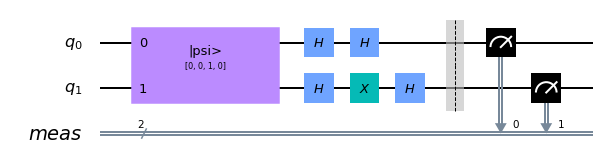

In [82]:
f3 = QuantumCircuit(2)
init(f3)
sandwich(f3)
f3.x(1)
sandwich(f3)
f3.measure_all()
f3.draw()

### Gdzie (na którym qbicie) jest wynik i jak go interpretować? Czy się zgadza?
Wynik jest na kubicie wejściowym (q0). Wynik 0 oznacza bramkę stałą, a 1 bramkę zmienną. Na poniższych histogramach widać, że wyniki się zgadzają.

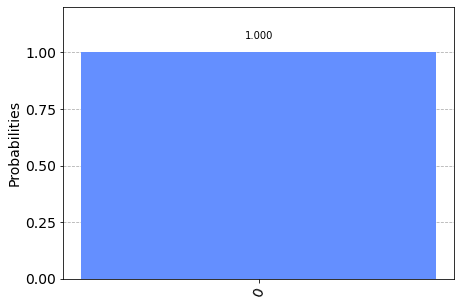

In [83]:
plot_histogram(trim(execute_qasm(f0)))

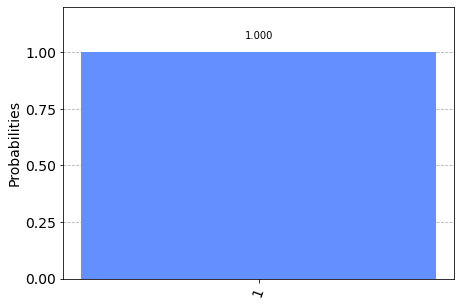

In [72]:
plot_histogram(trim(execute_qasm(f1)))

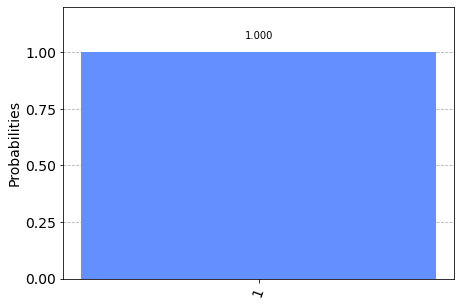

In [58]:
plot_histogram(trim(execute_qasm(f2)))

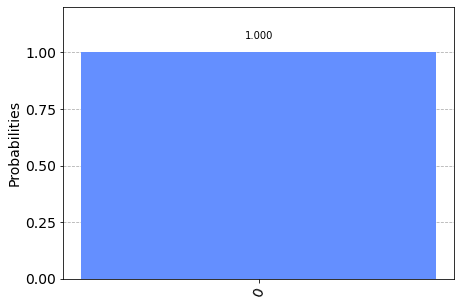

In [59]:
plot_histogram(trim(execute_qasm(f3)))

In [60]:
simulator = provider.get_backend('ibmq_rome')
job = execute(f0, simulator)
job_monitor(job)

Job Status: job has successfully run


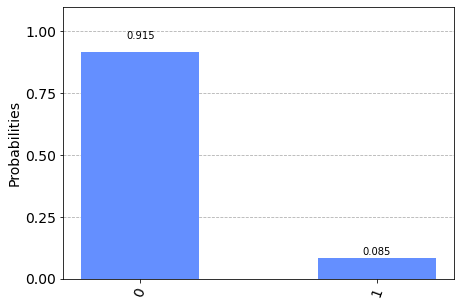

In [61]:
plot_histogram(trim(job.result().get_counts()))

In [62]:
job = execute(f1, simulator)
job_monitor(job)

Job Status: job has successfully run


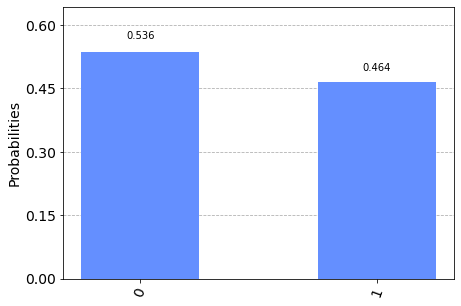

In [65]:
plot_histogram(trim(job.result().get_counts()))

In [73]:
job = execute(f2, simulator)
job_monitor(job)

Job Status: job has successfully run


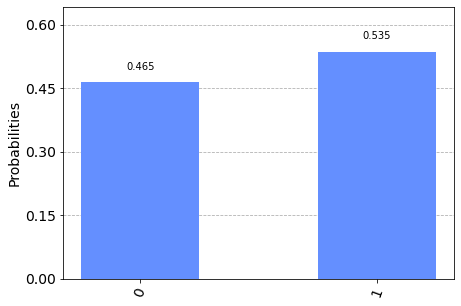

In [74]:
plot_histogram(trim(job.result().get_counts()))

In [75]:
job = execute(f3, simulator)
job_monitor(job)

Job Status: job has successfully run


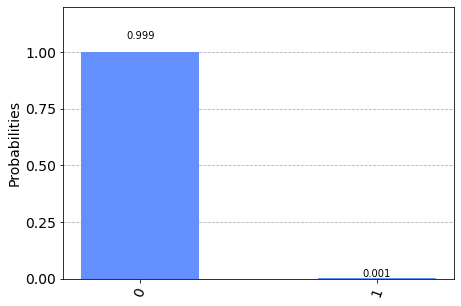

In [76]:
plot_histogram(trim(job.result().get_counts()))

### Porównaj z wynikami na prawdziwym urządzeniu kwantowym.
Komputer kwantowy ibmq_rome
f0: Wyniki są są zbliżone do symulowanych.
f1: Wynik losowy (około 50% szans na 0 i 1).
f2: Wynik losowy (około 50% szans na 0 i 1).
f3: Wynik niemal idealny.


# 2. Problem Bernsteina-Vaziraniego

Mając funkcję f(a,x) z pewnym ustalonym a, gdzie a i x mają długość n, a f oblicza xor z kolejnych bitów rezultatu mnożenia element-wise a i x, chcemy dowiedzieć się jak zbudowana jeset funkcja f, tzn. ile wynosi a.

In [110]:
def bv_quantum(a):
    c = QuantumCircuit(len(a) + 1)
    c.initialize([0, 1], c.num_qubits - 1)
    sandwich(c)
    for i, aa in enumerate(a):
        if aa == 1:
            c.cx(i, c.num_qubits - 1)
    sandwich(c)
    c.measure_all()
    return c

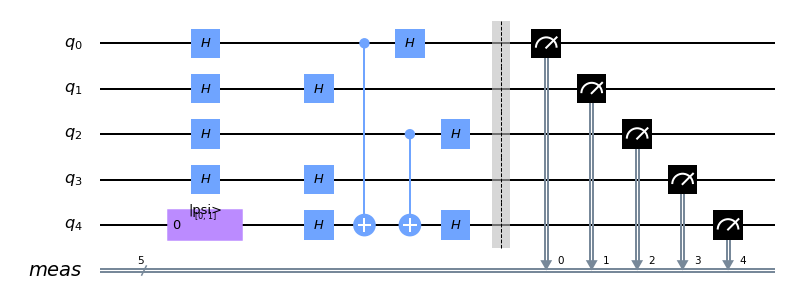

In [111]:
a = [1, 0, 1, 0] # ograniczamy się do 5 kubitowych komputerów
bv = bv_quantum(a)
bv.draw()

### Gdzie jest bramka obliczeniowa Uf dla problemu Bernsteina-Vaziraniego?
Pomiędzy bramkami Hadamarda (rysunek się rozjeżdża - chodzi o bramki CNOT).

###  W jaki sposób realizujemy rozwiązanie klasyczne, a w jaki kwantowe?
Rozwiązanie klasyczne otrzymujemy podając na wejście bramki Uf (bez Hadamardów) wektory postaci 100...0, 010...0, ..., 000...1. Tworzą one maskę na kolejne bity 'a'. Jeśli bit 'a' wynosił 1, to dla odpowiadającej mu maski otrzymamy wynik 0 (bo działa xor), dla bitu 0 jest przeciwnie. Rozwiązanie pojawia się na rejestrze wyjściowym.

Rozwiązanie kwantowe polega na zadaniu na wejściu superpozycji wszystkich masek (dzięki bramkom Hadamarda). Rozwiązanie pojawia się na rejestrach wejściowych.

### Rozwiązanie kwantowe

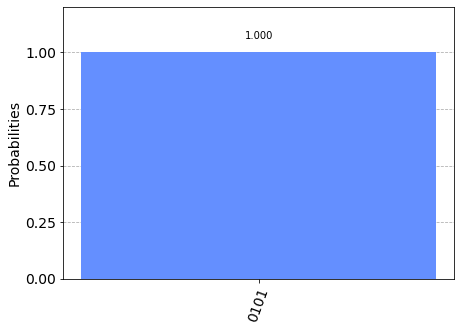

In [112]:
plot_histogram(trim(execute_qasm(bv)))

Wartość 'a' można odczytać z histogramu. Należy pamiętać, że pierwszy bit 'a' znajduje się po prawej stronie podpisu, ponieważ w tej implementacji pierwszy bit odpowiada pierwszemu kubitowi.

Sprawdźmy inne wartości 'a':

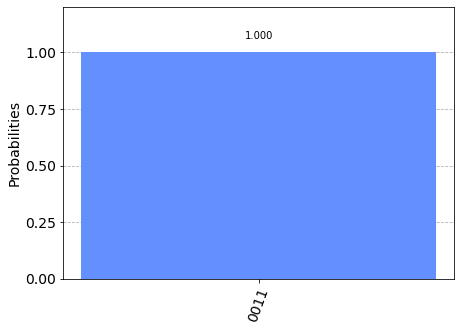

In [122]:
plot_histogram(trim(execute_qasm(bv_quantum([1, 1, 0, 0]))))

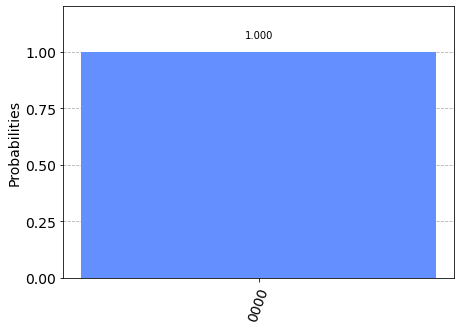

In [123]:
plot_histogram(trim(execute_qasm(bv_quantum([0, 0, 0, 0]))))

Porównanie pierwszego wariantu 'a' na prawdziwym komputerze:

In [115]:
job = execute(bv, simulator)
job_monitor(job)

Job Status: job has successfully run


### Porównaj z wynikami na prawdziwym urządzeniu kwantowym.

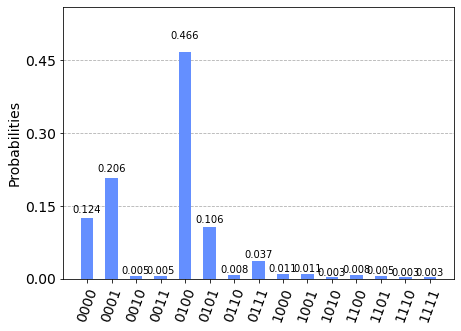

In [129]:
plot_histogram(trim(job.result().get_counts()))

Poprawny wynik (0101) ma tylko 10% prawdopodieństwa.

In [120]:
def bv_classic(a, x_i):
    c = QuantumCircuit(len(a) + 1, 1)
    c.initialize([0, 1], x_i)
    for i, aa in enumerate(a):
        if aa == 1:
            c.cx(i, c.num_qubits - 1)
    c.measure([c.num_qubits - 1], [0])
    return c

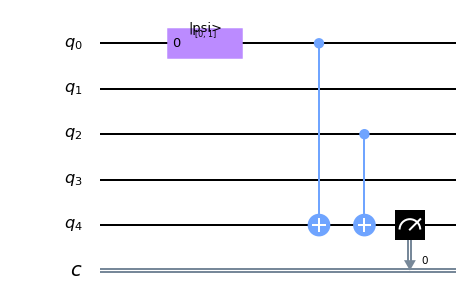

In [121]:
a = [1, 0, 1, 0]
bv = bv_classic(a,0)
bv.draw()

In [128]:
print([execute_qasm(bv_classic([1, 0, 1, 0], i)) for i in range(4)])

[{'1': 1024}, {'0': 1024}, {'1': 1024}, {'0': 1024}]


### Gdzie (na których qbitach) otrzymujemy rozwiązanie klasyczne, a na których kwantowe?  Ile wynosi i czy się zgadza ?
Rozwiązanie klasyczne mierzymy na kubicie wyjściowym (q4), a kwantowe na wejściowych (q0-q3).
Rozwiązania są zgodne.

Rozwiązanie klasyczne na prawdziwym komputerze:

In [132]:
job = execute(bv_classic([1, 0, 1, 0], 0), simulator)
job_monitor(job)

Job Status: job has successfully run


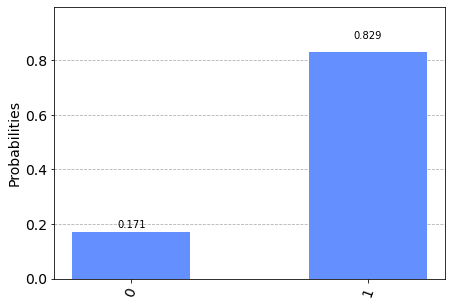

In [133]:
plot_histogram(job.result().get_counts())

In [136]:
job = execute(bv_classic([1, 0, 1, 0], 1), simulator)
job_monitor(job)

Job Status: job incurred error     


In [135]:
plot_histogram(job.result().get_counts())

IBMQJobFailureError: 'Unable to retrieve result for job 5eb31f8ec165ac00126d6c16. Job has failed. Use job.error_message() to get more details.'

In [140]:
job.error_message()

'reset instructions are not supported. Error code: 8014.'

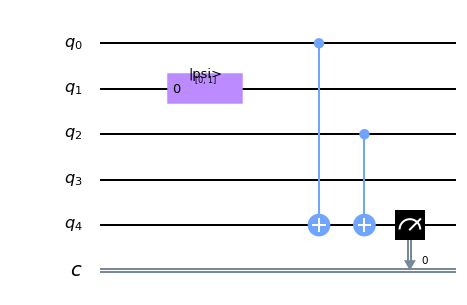

In [141]:
bv_classic([1, 0, 1, 0], 1).draw()

Niestety rozwiązanie klasyczne napotyka na błąd symulatora.